## AI-HUB 데이터 확인

In [1]:
import os
from glob import glob

# 1. 모든 json 파일 경로 수집 (재귀적으로)
json_paths = glob('./data_json/**/*.json', recursive=True)

# 2. 파일 이름만 추출 (중복 제거용)
json_filenames = set(os.path.basename(path) for path in json_paths)

# 3. 개수 출력
print(f"📄 총 JSON 파일 수: {len(json_paths)}")
print(f"🆔 유니크한 JSON 파일 이름 수: {len(json_filenames)}")


📄 총 JSON 파일 수: 21544
🆔 유니크한 JSON 파일 이름 수: 21544


### step01 : json(메타)과 실제 데이터 확인

In [2]:
import json
from glob import glob
import os
import pandas as pd

# JSON 파일 경로 수집
json_paths = glob("./data_json/**/*.json", recursive=True)

records = []

for path in json_paths:
    with open(path, 'r', encoding='utf-8') as f:
        data = json.load(f)
        
        # 안전한 접근을 위한 get
        meta = data.get('metadata', {})
        animal = meta.get('animal', {})
        owner = meta.get('owner', {})
        inspect = meta.get('inspect', {})

        records.append({
            "json_file": os.path.basename(path),
            "breed": animal.get("breed"),
            "cat_action": inspect.get("action"),
            "cat_emotion": inspect.get("emotion"),
            "owner_situation": owner.get("situation"),
            "owner_emotion": owner.get("emotion"),
            # "seq": meta.get("seq"),
            "freams_anotations" : len(data['annotations']),
        })

# DataFrame 변환
df = pd.DataFrame(records)

# 미리보기
# print(df.head())


In [3]:
import os
import pandas as pd
from glob import glob

# # 메타데이터 파일 로딩
# df = pd.read_csv("your_meta_file.csv")  # <- 실제 파일명으로 수정하세요

# 루트 경로
base_path = "./data_image"

# 결과를 저장할 리스트
found_list = []
frame_count_list = []
file_path_list = []

# 각 json_file에 대해 처리
for json_file in df['json_file']:
    folder_name = json_file.replace(".json", "")  # → cat-grooming-XXXXX
    found = False
    frame_count = 0
    found_path = None  # 폴더 경로 저장용

    # data_image/*/ 하위 폴더 탐색
    for action_dir in os.listdir(base_path):
        action_path = os.path.join(base_path, action_dir)

        # 디렉토리인지 확인
        if not os.path.isdir(action_path):
            continue

        target_path = os.path.join(action_path, folder_name)
        if os.path.isdir(target_path):
            found = True
            frame_files = glob(os.path.join(target_path, "*.jpg"))
            frame_count = len(frame_files)
            found_path = target_path  # 경로 저장
            break  # 찾았으면 중단

    found_list.append(found)
    frame_count_list.append(frame_count)
    file_path_list.append(found_path if found else None)

# 결과 추가
df["folder_found"] = found_list
df["frame_count_checked"] = frame_count_list
df["file_path"] = file_path_list

# 출력 예시
print(df[["json_file", "folder_found", "frame_count_checked", "file_path"]].head())

                  json_file  folder_found  frame_count_checked file_path
0  cat-grooming-044661.json         False                    0      None
1  cat-grooming-050955.json         False                    0      None
2  cat-grooming-021927.json         False                    0      None
3  cat-grooming-016894.json         False                    0      None
4  cat-grooming-074776.json         False                    0      None


In [4]:
df_true = df[df["folder_found"] == True]
print("✅ 폴더가 존재하는 항목 (True):")
print(df_true[["json_file", "frame_count_checked"]])

✅ 폴더가 존재하는 항목 (True):
                        json_file  frame_count_checked
5186   cat-armstretch-068412.json                   85
5188   cat-armstretch-080026.json                   92
5189   cat-armstretch-051047.json                   96
5191   cat-armstretch-045006.json                   90
5192   cat-armstretch-092848.json                   80
...                           ...                  ...
21533     cat-getdown-067750.json                   97
21534     cat-getdown-038744.json                   89
21535     cat-getdown-040368.json                   96
21537     cat-getdown-039664.json                   99
21539     cat-getdown-021359.json                   84

[8976 rows x 2 columns]


In [5]:
df_false = df[df["folder_found"] == False]
print("❌ 폴더가 없는 항목 (False):")
print(df_false[["json_file"]])

❌ 폴더가 없는 항목 (False):
                                  json_file
0                  cat-grooming-044661.json
1                  cat-grooming-050955.json
2                  cat-grooming-021927.json
3                  cat-grooming-016894.json
4                  cat-grooming-074776.json
...                                     ...
21538               cat-getdown-029660.json
21540  20201202_cat-getdown-003764.mp4.json
21541               cat-getdown-024510.json
21542               cat-getdown-029025.json
21543  20201031_cat-getdown-000311.mp4.json

[12568 rows x 1 columns]


> 이전에 필요 없는 데이터(동영상 기준)을 삭제함.   
> 최종적으로 8976개 데이터를 사용하는 것이 맞음

In [6]:
# # 혹시 몰라서 추가 확인 작업
# # 서로 다른 값이 있는 행만 필터링
# diff_df = df[df['seq'] != df['freams_anotations']]

# print(f"seq와 freams_anotations 값이 다른 경우: {len(diff_df)}건")
# print(diff_df[['json_file', 'seq', 'freams_anotations']])

# ## 확인해보니 다운 받을 수 있는 이미지 수는 freams_anotations에 맞춰서 확인할 수 있었음.

In [7]:
# diff_df = df[df['owner_emotion'] != df['cat_emotion']]
# print(f"owner_emotion과 cat_emotion 값이 다른 경우: {len(diff_df)}건")
# print(diff_df[['json_file', 'owner_emotion', 'cat_emotion','owner_situation']])

# # owner_emotion과 cat_emotion 값이 다른 경우: 5266건
# # >> 꽤 많은 편..

In [8]:
# # frame 수가 다른 행만 필터링
# df_mismatch = df[df["frame_count_checked"] != df["freams_anotations"]]

# # 확인용 출력
# print("⚠️ 프레임 수 불일치 항목:")
# print(df_mismatch[["json_file", "freams_anotations", "frame_count_checked"]])

# ## json에서 확인된 프레임 수와 실제 존재하는 이미지 프레임 수가 다른 경우가 7045개 있음. 

---

### step02 : 데이터 전처리하기 위해 분석
- frame_count_checked(실제 프레임 수)를 기반으로 필요 없는 데이터 전처리하기
- 전처리 후, 라벨 균형 확인
   - 개별, 조합별

In [9]:
df["frame_count_checked"].describe()

count    21544.000000
mean        38.720897
std         46.170389
min          0.000000
25%          0.000000
50%          0.000000
75%         89.000000
max        110.000000
Name: frame_count_checked, dtype: float64

In [10]:
# 기준 범위 설정
min_len = 80
max_len = 110

# 조건: 프레임 수가 80 이상 110 이하
df_fixed = df[(df["frame_count_checked"] >= min_len) & (df["frame_count_checked"] <= max_len)].copy()

print("📊 남은 데이터 수:", len(df_fixed))
print(df_fixed[["json_file", "frame_count_checked"]].head())


📊 남은 데이터 수: 8976
                       json_file  frame_count_checked
5186  cat-armstretch-068412.json                   85
5188  cat-armstretch-080026.json                   92
5189  cat-armstretch-051047.json                   96
5191  cat-armstretch-045006.json                   90
5192  cat-armstretch-092848.json                   80


In [11]:
# df_fixed.columns
# ['json_file', 'breed', 'cat_action', 'cat_emotion', 'owner_situation', 'owner_emotion', 'freams_anotations', 'folder_found', 'frame_count_checked']

In [12]:
print("🎯 cat_action 라벨 분포:")
print(df_fixed["cat_action"].value_counts())

🎯 cat_action 라벨 분포:
cat_action
꼬리를 흔드는 동작           1947
걷거나 달리는 동작           1410
앞발을 뻗어 휘적거리는 동작      1174
옆으로 눕는 동작            1059
발을 숨기고 웅크리고 앉는 동작     942
납작 엎드리는 동작            669
배를 보여주는 동작            538
머리를 들이대는 동작           472
앞발로 꾹꾹 누르는 동작         443
좌우로 뒹구는 동작            322
Name: count, dtype: int64


In [13]:
print("😊 cat_emotion 라벨 분포:")
print(df_fixed["cat_emotion"].value_counts())

# >> 불안/슬픔 + 공포로 라벨 합치기
# 6개에서 5개

😊 cat_emotion 라벨 분포:
cat_emotion
편안/안정     6085
행복/즐거움    1785
공격성        592
화남/불쾌      345
불안/슬픔      156
공포          13
Name: count, dtype: int64


In [14]:
print("🏠 owner_situation 라벨 분포:")
print(df_fixed["owner_situation"].value_counts())

🏠 owner_situation 라벨 분포:
owner_situation
먹을것, 장난감이 앞에 있을 때                       2443
기타                                      1961
휴식시간, 자신만의 공간에 들어갔을 때(캔넬, 소파 침대 밑 등)    1619
잠들기 전이나 같이 누워있을 때                        957
편안히 쓰다듬어 줄 때                             603
보호자가 집에 돌아왔을 때                           565
산책이나 노즈워크 중                              242
싫어하는 부위를 만질 때                            157
산책 준비 또는 산책중일 때                           74
낯선 소리가 나거나 낯선 사람을 봤을 때                    61
밥그릇, 장난감과 같은 소유물을 만질 때                    60
다른 사람이나 동물을 만났을 때                         52
낯선 장소에 있거나 낯선 소리가 날 때                     48
빗질/발톱깍기/목욕 등 위생관리를 할 때                    29
낯선 동물 또는 사람을 만났을 때                        28
보호자와 떨어질 때/혼자 남겨지거나 낯선장소에 있을 때            17
낯선 소리가 났을 때                               16
다른 동물을 보거나 낯선 사람을 만날 때 산책 나왔을 때           10
보호자에게 혼났을 때                                8
혼날 때                                       7
목욕하거나 싫어하는 부위를 만질 때                        6
낯선 도구를 자신의 몸에 

In [15]:
unique_count = df_fixed["owner_situation"].nunique()
print("owner_situation의 유니크 라벨 수:", unique_count)

owner_situation의 유니크 라벨 수: 27


In [16]:
# print("🐱 품종(breed) 분포:")
# print(df_fixed["breed"].value_counts())

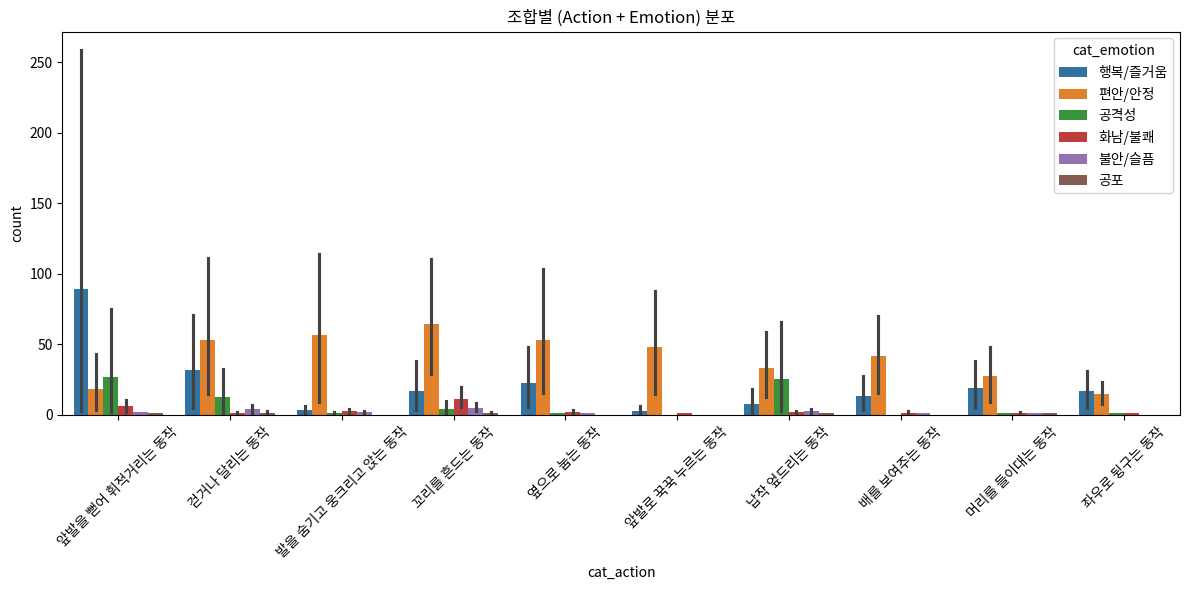

In [ ]:
group_counts = (
    df_fixed.groupby(["cat_action", "cat_emotion", "owner_situation"])
    .size()
    .reset_index(name="count")
    .sort_values(by="count", ascending=False)
)

# print(group_counts.head(10))  # 상위 10개 조합 출력

pivot = df_fixed.pivot_table(
    index="cat_action", columns="cat_emotion", values="json_file", aggfunc="count", fill_value=0
)
# print(pivot)

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import warnings

# matplotlib findfont 경고 끄기
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")
warnings.filterwarnings("ignore", message="findfont: Font family .* not found")

# NotoSansCJK 폰트 경로 지정
font_path = '/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc'
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(12, 6))
sns.barplot(
    data=group_counts,
    x="cat_action",
    y="count",
    hue="cat_emotion"
)
plt.xticks(rotation=45)
plt.title("조합별 (Action + Emotion) 분포")
plt.tight_layout()
plt.show()



### step03: 라벨 정리하기   
- action : 12개 그대로
- emotion : 6개 > 5개(불안/슬픔 + 공포로  라벨 합침)
- situation : 27개 > 12개

In [18]:
# 감정 통합 맵
emotion_map = {
    "불안/슬픔": "불안/공포",
    "공포": "불안/공포"
}

# 적용
df_fixed["cat_emotion_fused"] = df_fixed["cat_emotion"].replace(emotion_map)
df_fixed["owner_emotion_fused"] = df_fixed["owner_emotion"].replace(emotion_map)


In [19]:
owner_situation_map = {
    # 🧸 놀이/자극 상황
    "먹을것, 장난감이 앞에 있을 때": "놀이/자극",
    "밥그릇, 장난감과 같은 소유물을 만질 때": "놀이/자극",
    "산책이나 노즈워크 중": "놀이/자극",
    "산책 준비 또는 산책중일 때": "놀이/자극",
    "다른 동물을 보거나 낯선 사람을 만날 때 산책 나왔을 때": "놀이/자극",

    # 😴 휴식/편안한 상황
    "휴식시간, 자신만의 공간에 들어갔을 때(캔넬, 소파 침대 밑 등)": "휴식/편안",
    "잠들기 전이나 같이 누워있을 때": "휴식/편안",
    "편안히 쓰다듬어 줄 때": "휴식/편안",

    # 👋 돌아옴/재회 상황
    "보호자가 집에 돌아왔을 때": "돌아옴/재회",

    # 🧼 위생관리
    "빗질/발톱깍기/목욕 등 위생관리를 할 때": "위생관리",
    "목욕할 때": "위생관리",
    "목욕하거나 싫어하는 부위를 만질 때": "위생관리",

    # 😾 싫은 자극/처벌
    "싫어하는 부위를 만질 때": "싫은 자극/처벌",
    "보호자에게 혼났을 때": "싫은 자극/처벌",
    "혼날 때": "싫은 자극/처벌",

    # 😨 낯선 상황/불안
    "낯선 소리가 나거나 낯선 사람을 봤을 때": "낯선 상황/불안",
    "낯선 장소에 있거나 낯선 소리가 날 때": "낯선 상황/불안",
    "낯선 소리가 났을 때": "낯선 상황/불안",
    "낯선 동물 또는 사람을 만났을 때": "낯선 상황/불안",
    "다른 사람이나 동물을 만났을 때": "낯선 상황/불안",
    "낯선 도구를 자신의 몸에 사용할 때(미용도구 등)": "낯선 상황/불안",
    "낯선 도구를 자신의 몸에 사용할 때(미용도구)": "낯선 상황/불안",
    "초인종 소리가 났을 때": "낯선 상황/불안",
    "다른 동물을 보거나 낯선 사람을 만날 때" : "낯선 상황/불안",

    # 😿 분리/고립
    "보호자와 떨어질 때/혼자 남겨지거나 낯선장소에 있을 때": "분리/고립",
    "보호자와 떨어지거나 혼자 남겨졌을 때": "분리/고립",
    
    "기타": "기타",
}


In [20]:
df_fixed["owner_situation_mapped"] = df_fixed["owner_situation"].map(owner_situation_map)
print("🎯 통합된 owner_situation 분포:")
print(df_fixed["owner_situation_mapped"].value_counts(dropna=False))


🎯 통합된 owner_situation 분포:
owner_situation_mapped
휴식/편안       3179
놀이/자극       2829
기타          1961
돌아옴/재회       565
낯선 상황/불안     212
싫은 자극/처벌     172
위생관리          38
분리/고립         20
Name: count, dtype: int64


여기서 "기타"가 너무 많은 분포를 가짐. 노이즈가 될 수 있음.    
> "기타"를 제거하지 않고 세분화하기 전략 사용함.   
>> situation 칼럼 자체가 owner에서 가져온 것임. 그래서 owner의 emotion을 합쳐서 emotion_기타로 세분화하기로 함.

In [21]:
def fuse_situation(row):
    if row["owner_situation_mapped"] == "기타":
        return f"{row['owner_emotion_fused']}_기타"
    else:
        return row["owner_situation_mapped"]

df_fixed["owner_situation_fused"] = df_fixed.apply(fuse_situation, axis=1)

In [22]:
print("🎯 다시 재정의된 owner_situation 분포:")
print(df_fixed["owner_situation_fused"].value_counts(dropna=False))


🎯 다시 재정의된 owner_situation 분포:
owner_situation_fused
휴식/편안        3179
놀이/자극        2829
편안/안정_기타     1191
행복/즐거움_기타     587
돌아옴/재회        565
낯선 상황/불안      212
싫은 자극/처벌      172
화남/불쾌_기타      102
불안/공포_기타       49
위생관리           38
공격성_기타         32
분리/고립          20
Name: count, dtype: int64


## 📊 df_fixed 라벨 정리 및 균형 조정 요약   

### 1. 상황 (owner_situation_fused) 라벨 정리

- 기존 상황 라벨 `기타` → owner 감정과 조합해 `감정_기타` 형태로 의미 보강  
- 클래스 불균형 존재   

| 주요 클래스          | 소수 클래스(유지/보류)           | 제거 대상/통합 권장  |
|---------------------|-------------------------------|-------------------|
| 휴식/편안           | 화남/불쾌_기타, 불안/공포_기타    | 위생관리, 분리/고립    |
| 놀이/자극           | 공격성_기타                    |                   |
| 편안/안정_기타       |                               |                   |
| 행복/즐거움_기타     |                               |                   |
| 돌아옴/재회         |                               |                   |
| 낯선 상황/불안       |                               |                   |
| 싫은 자극/처벌       |                               |                   |
   

### 2. 감정 (cat_emotion_fused) 라벨

- 감정 라벨 `불안/슬픔` + `공포` 통합 → `불안/공포`  
- 총 5개 감정 라벨 유지  
- 클래스 불균형은 **클래스 가중치 적용** 또는 소수 감정 데이터 증강 고민 가능

In [23]:
df_fixed.columns

Index(['json_file', 'breed', 'cat_action', 'cat_emotion', 'owner_situation',
       'owner_emotion', 'freams_anotations', 'folder_found',
       'frame_count_checked', 'file_path', 'cat_emotion_fused',
       'owner_emotion_fused', 'owner_situation_mapped',
       'owner_situation_fused'],
      dtype='object')

In [24]:
# 저장 및 기록할 칼럼 : ['json_file','file_path','frame_count_checked','cat_action','cat_emotion_fused','owner_situation_fused']

In [25]:
# 사용할 칼럼 리스트
cols = ['json_file', 'file_path', 'frame_count_checked', 'cat_action', 'cat_emotion_fused', 'owner_situation_fused']

# 원하는 칼럼만 추출
df_final = df_fixed[cols].copy()

# 컬럼명 변경
df_final.rename(columns={
    'json_file': 'meta_json',
    'frame_count_checked': 'number of frames',
    'cat_emotion_fused': 'cat_emotion',
    'owner_situation_fused': 'owner_situation'
}, inplace=True)

# CSV 저장 (경로와 파일명 원하는 대로 수정)
# df_final.to_csv('./data/final_total_dataset.csv', index=False)

# 저장 확인 출력
# print(df_final.head())


### 확인용

In [26]:
import pandas as pd

# CSV 파일 불러오기
df = pd.read_csv('./data/final_total_dataset.csv')

# meta_json 개수 (전체 파일 수)
print("== meta_json 개수 (전체 파일 수) ==")
print(len(df['meta_json'].unique()))
print()

# number of frames 통계
print("== number of frames 통계 ==")
print(df['number of frames'].describe())
print()

# cat_action 분포 및 유니크 개수
print("== cat_action 분포 ==")
print(df['cat_action'].value_counts())
print(f"🐾 cat_action 라벨 개수: {df['cat_action'].nunique()}")
print()

# cat_emotion 분포 및 유니크 개수
print("== cat_emotion 분포 ==")
print(df['cat_emotion'].value_counts())
print(f"❤️cat_emotion 라벨 개수: {df['cat_emotion'].nunique()}")
print()

# owner_situation 분포 및 유니크 개수
print("== owner_situation 분포 ==")
print(df['owner_situation'].value_counts())
print(f"🏠 owner_situation 라벨 개수: {df['owner_situation'].nunique()}")
print()

== meta_json 개수 (전체 파일 수) ==
8976

== number of frames 통계 ==
count    8976.000000
mean       92.937054
std         8.806401
min        80.000000
25%        85.000000
50%        92.000000
75%       100.000000
max       110.000000
Name: number of frames, dtype: float64

== cat_action 분포 ==
cat_action
꼬리를 흔드는 동작           1947
걷거나 달리는 동작           1410
앞발을 뻗어 휘적거리는 동작      1174
옆으로 눕는 동작            1059
발을 숨기고 웅크리고 앉는 동작     942
납작 엎드리는 동작            669
배를 보여주는 동작            538
머리를 들이대는 동작           472
앞발로 꾹꾹 누르는 동작         443
좌우로 뒹구는 동작            322
Name: count, dtype: int64
🐾 cat_action 라벨 개수: 10

== cat_emotion 분포 ==
cat_emotion
편안/안정     6085
행복/즐거움    1785
공격성        592
화남/불쾌      345
불안/공포      169
Name: count, dtype: int64
❤️cat_emotion 라벨 개수: 5

== owner_situation 분포 ==
owner_situation
휴식/편안        3179
놀이/자극        2829
편안/안정_기타     1191
행복/즐거움_기타     587
돌아옴/재회        565
낯선 상황/불안      212
싫은 자극/처벌      172
화남/불쾌_기타      102
불안/공포_기타       49
위생관리           38
공격성_기타     

---

### 필요 없는 원본 데이터 삭제하기

In [27]:
# import os
# import shutil

# # df_fixed의 json_file 리스트 (확장자 제거)
# valid_folders = set(df_fixed['json_file'].str.replace('.json', ''))

# base_path = './data_image'

# for main_dir in os.listdir(base_path):
#     main_path = os.path.join(base_path, main_dir)
#     if not os.path.isdir(main_path):
#         continue

#     for folder in os.listdir(main_path):
#         folder_path = os.path.join(main_path, folder)

#         if folder not in valid_folders:
#             # 삭제 대상
#             print(f"🗑️ Deleting folder: {folder_path}")
#             shutil.rmtree(folder_path)
